In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import cv2

In [56]:
def get_data(data_path):
    categories = {"Araneae": 0, 
              "Coleoptera": 1, 
              "Diptera": 2, 
              "Hemiptera": 3, 
              "Hymenoptera": 4, 
              "Lepidoptera": 5, 
              "Odonata": 6}
    data_images = []
    data_labels = []
    for i in os.listdir(data_path):
        full_path=os.path.join(data_path+i)
        if(os.path.isdir(full_path)):
            for image_file in os.listdir(full_path): 
                image = cv2.imread(full_path + "/" + image_file)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                data_images.append(image)
                data_labels.append(categories[i])
    return data_images, data_labels

In [57]:
data_path="C:/Users/mmlit/neuron_net/lab1/ArTaxOr_128x128/"

x_train, y_train = get_data(data_path + "train/")
x_test, y_test = get_data(data_path + "test/")

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [69]:
print(x_train.shape)
print(y_train.shape)

(13838, 128, 128, 3)
(13838,)


In [63]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [64]:
y_train_cat = keras.utils.to_categorical(y_train, 7)
y_test_cat = keras.utils.to_categorical(y_test, 7)

In [11]:
def show_loss_accuracy(history):
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(12,5))

    axs[0].plot(history.history["loss"],label = "Train Loss", color = "red")
    axs[0].plot(history.history["val_loss"],label = "Validation Loss",color = "green")
    axs[0].set_title("Model Loss", color = "blue", size = 13)
    axs[0].legend()

    axs[1].plot(history.history["accuracy"],label = "Train Accuracy", color = "red")
    axs[1].plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "green")
    axs[1].set_title("Model Accuracy", color = "blue", size = 13)
    axs[1].legend()

    plt.show()

In [12]:
def show_matrix(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    y_true = y_test

    cm = confusion_matrix(y_true, y_pred_classes)

    Labels = ["Araneae", "Coleoptera", "Diptera", "Hemiptera", "Hymenoptera", "Lepidoptera", "Odonata"]

    f, ax = plt.subplots(figsize=(10,10))

    sns.heatmap(cm, annot=True, fmt=".0f")

    ax.set_xticklabels(Labels)
    ax.set_yticklabels(Labels)

    plt.show()

    print(classification_report(y_true, y_pred_classes))

In [25]:
image_size = (128, 128, 3)
batch_size = 64

In [26]:
model1 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(7,  activation='softmax')
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 dropout_1 (Dropout)         (None, 65536)            

In [27]:
model1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
history1 = model1.fit(x_train, y_train_cat, 
                   batch_size=batch_size, 
                   epochs=5, 
                   validation_split=0.2)

Epoch 1/5
173/173 [==============================] - 104s 590ms/step - loss: 1.9923 - accuracy: 0.1765 - val_loss: 1.9171 - val_accuracy: 0.2041
Epoch 2/5
173/173 [==============================] - 93s 535ms/step - loss: 1.8641 - accuracy: 0.2467 - val_loss: 1.8515 - val_accuracy: 0.2554
Epoch 3/5
173/173 [==============================] - 92s 534ms/step - loss: 1.7698 - accuracy: 0.3028 - val_loss: 1.8410 - val_accuracy: 0.2850
Epoch 4/5
173/173 [==============================] - 91s 527ms/step - loss: 1.6205 - accuracy: 0.3870 - val_loss: 1.7923 - val_accuracy: 0.3017
Epoch 5/5
173/173 [==============================] - 91s 526ms/step - loss: 1.3826 - accuracy: 0.4884 - val_loss: 1.9093 - val_accuracy: 0.3089


In [29]:
model1.evaluate(x_test, y_test_cat)

49/49 [==============================] - 3s 60ms/step - loss: 1.9021 - accuracy: 0.3121


[1.9021368026733398, 0.3120936155319214]

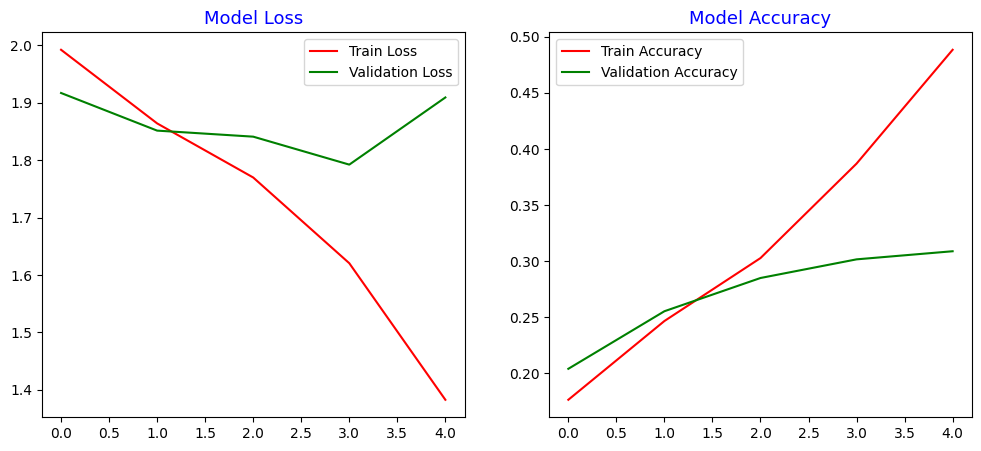

In [30]:
show_loss_accuracy(history1)

49/49 [==============================] - 3s 53ms/step


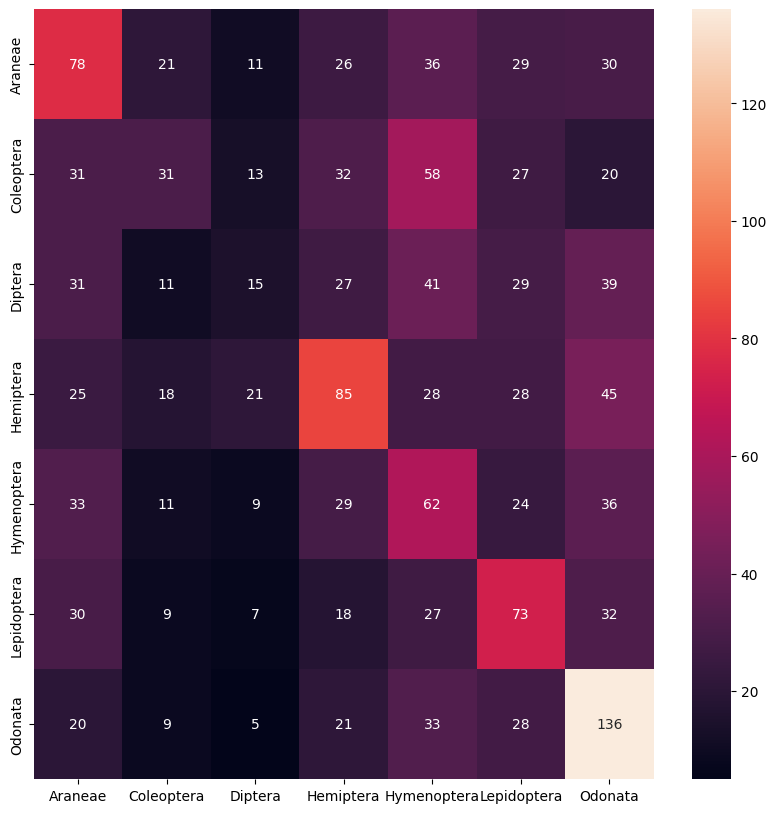

              precision    recall  f1-score   support

           0       0.31      0.34      0.33       231
           1       0.28      0.15      0.19       212
           2       0.19      0.08      0.11       193
           3       0.36      0.34      0.35       250
           4       0.22      0.30      0.25       204
           5       0.31      0.37      0.34       196
           6       0.40      0.54      0.46       252

    accuracy                           0.31      1538
   macro avg       0.30      0.30      0.29      1538
weighted avg       0.30      0.31      0.30      1538



In [31]:
show_matrix(model1, x_test, y_test)

In [48]:
image_size = (128, 128, 3)
batch_size = 64

In [49]:
model2 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=image_size),
    MaxPooling2D((4, 4), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(7,  activation='softmax')
])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 128)      

In [50]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
history2 = model2.fit(x_train, y_train_cat, 
                   batch_size=batch_size, 
                   epochs=10, 
                   validation_split=0.2)

Epoch 1/10
173/173 [==============================] - 114s 647ms/step - loss: 1.9245 - accuracy: 0.1975 - val_loss: 1.8746 - val_accuracy: 0.2341
Epoch 2/10
173/173 [==============================] - 101s 582ms/step - loss: 1.8190 - accuracy: 0.2763 - val_loss: 1.8151 - val_accuracy: 0.2959
Epoch 3/10
173/173 [==============================] - 103s 593ms/step - loss: 1.7359 - accuracy: 0.3287 - val_loss: 1.7567 - val_accuracy: 0.3262
Epoch 4/10
173/173 [==============================] - 102s 590ms/step - loss: 1.6504 - accuracy: 0.3670 - val_loss: 1.7517 - val_accuracy: 0.3168
Epoch 5/10
173/173 [==============================] - 103s 596ms/step - loss: 1.5676 - accuracy: 0.4048 - val_loss: 1.7143 - val_accuracy: 0.3595
Epoch 6/10
173/173 [==============================] - 95s 549ms/step - loss: 1.4783 - accuracy: 0.4462 - val_loss: 1.6884 - val_accuracy: 0.3750
Epoch 7/10
173/173 [==============================] - 99s 572ms/step - loss: 1.3885 - accuracy: 0.4797 - val_loss: 1.7131 - v

In [52]:
model2.evaluate(x_test, y_test_cat)

49/49 [==============================] - 4s 80ms/step - loss: 1.8591 - accuracy: 0.3732


[1.859138011932373, 0.37321195006370544]

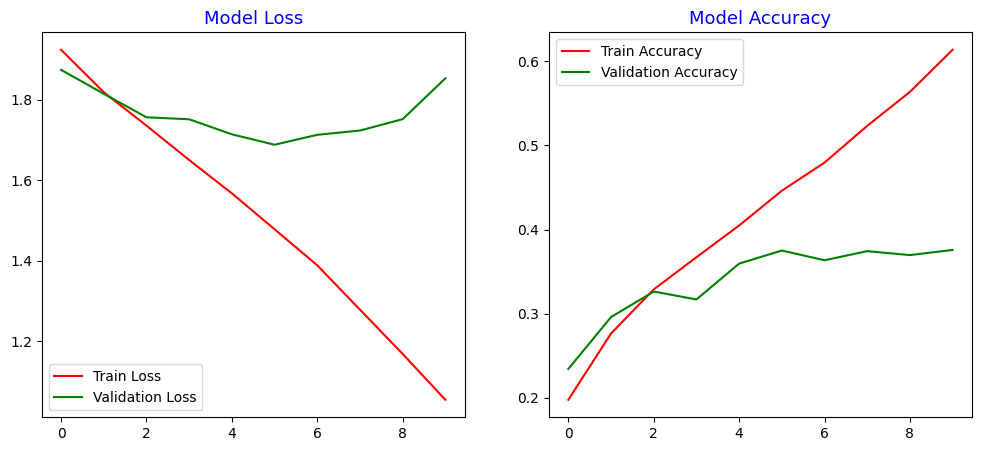

In [53]:
show_loss_accuracy(history2)

49/49 [==============================] - 3s 67ms/step


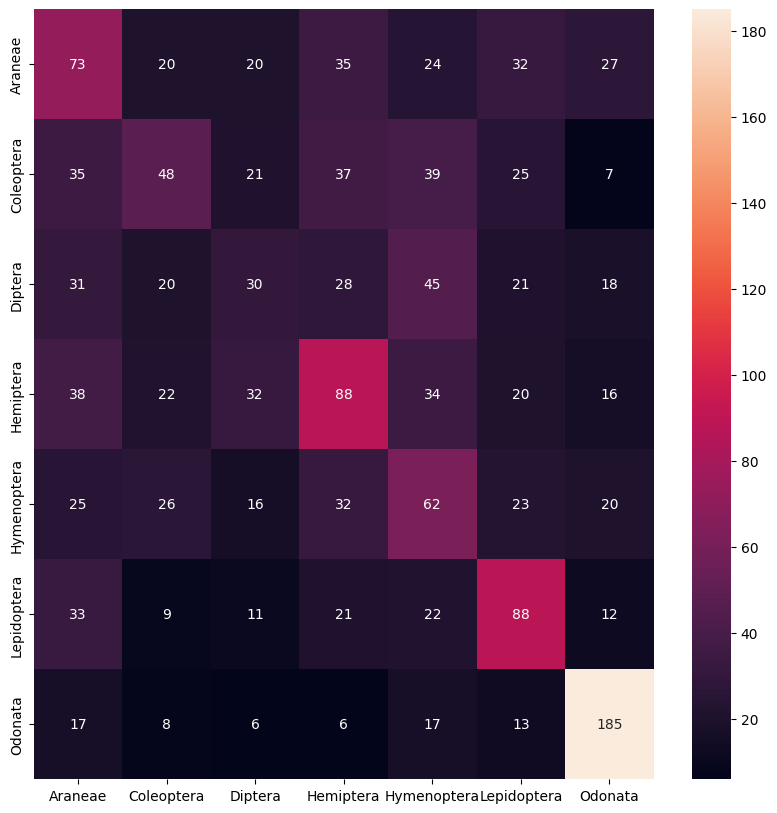

              precision    recall  f1-score   support

           0       0.29      0.32      0.30       231
           1       0.31      0.23      0.26       212
           2       0.22      0.16      0.18       193
           3       0.36      0.35      0.35       250
           4       0.26      0.30      0.28       204
           5       0.40      0.45      0.42       196
           6       0.65      0.73      0.69       252

    accuracy                           0.37      1538
   macro avg       0.35      0.36      0.36      1538
weighted avg       0.36      0.37      0.37      1538



In [54]:
show_matrix(model2, x_test, y_test)

In [24]:
image_size = (128, 128, 3)
batch_size = 64

In [25]:
model3 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=image_size),
    MaxPooling2D((4, 4), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(7,  activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 128)      

In [26]:
model3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
history3 = model3.fit(x_train, y_train_cat, 
                   batch_size=batch_size, 
                   epochs=10, 
                   validation_split=0.2)

Epoch 1/10
173/173 [==============================] - 163s 916ms/step - loss: 1.9421 - accuracy: 0.1724 - val_loss: 1.9265 - val_accuracy: 0.2070
Epoch 2/10
173/173 [==============================] - 148s 858ms/step - loss: 1.8676 - accuracy: 0.2430 - val_loss: 1.7947 - val_accuracy: 0.2807
Epoch 3/10
173/173 [==============================] - 150s 870ms/step - loss: 1.7540 - accuracy: 0.3089 - val_loss: 1.7360 - val_accuracy: 0.3176
Epoch 4/10
173/173 [==============================] - 158s 912ms/step - loss: 1.6661 - accuracy: 0.3540 - val_loss: 1.7093 - val_accuracy: 0.3428
Epoch 5/10
173/173 [==============================] - 142s 822ms/step - loss: 1.6119 - accuracy: 0.3760 - val_loss: 1.6785 - val_accuracy: 0.3425
Epoch 6/10
173/173 [==============================] - 149s 860ms/step - loss: 1.5586 - accuracy: 0.4055 - val_loss: 1.7148 - val_accuracy: 0.3360
Epoch 7/10
173/173 [==============================] - 146s 847ms/step - loss: 1.4908 - accuracy: 0.4319 - val_loss: 1.6458 -

In [17]:
model3.evaluate(x_test, y_test_cat)

49/49 [==============================] - 4s 86ms/step - loss: 1.6403 - accuracy: 0.3784


[1.6403090953826904, 0.37841352820396423]

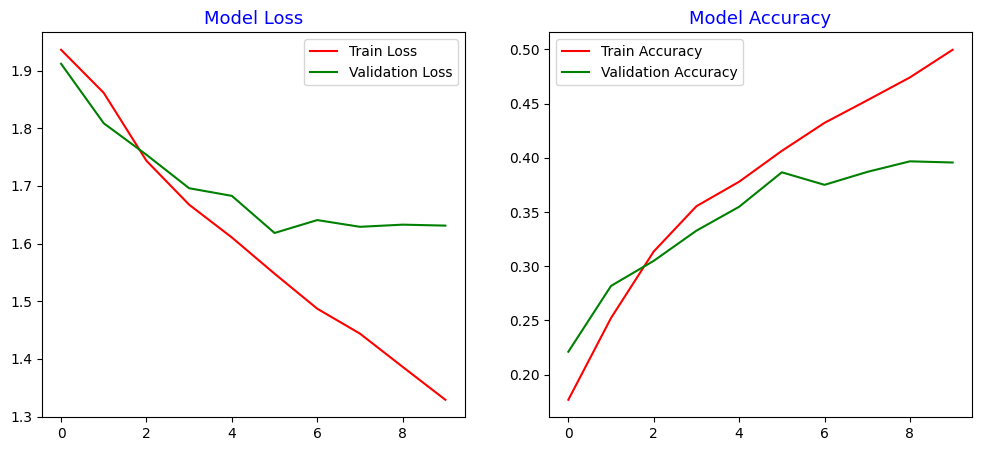

In [18]:
show_loss_accuracy(history3)

49/49 [==============================] - 4s 75ms/step


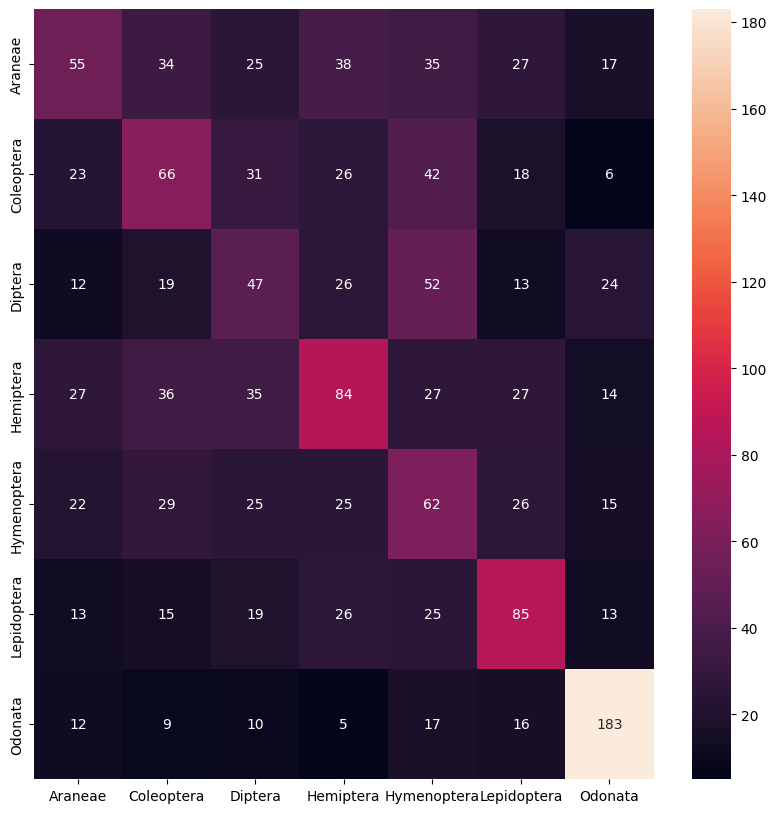

              precision    recall  f1-score   support

           0       0.34      0.24      0.28       231
           1       0.32      0.31      0.31       212
           2       0.24      0.24      0.24       193
           3       0.37      0.34      0.35       250
           4       0.24      0.30      0.27       204
           5       0.40      0.43      0.42       196
           6       0.67      0.73      0.70       252

    accuracy                           0.38      1538
   macro avg       0.37      0.37      0.37      1538
weighted avg       0.38      0.38      0.38      1538



In [19]:
show_matrix(model3, x_test, y_test)

In [20]:
image_size = (128, 128, 3)
batch_size = 64

In [21]:
model4 = Sequential([
    Conv2D(32, (7,7), padding='same', activation='relu', input_shape=image_size),
    MaxPooling2D((4, 4), strides=2),
    Conv2D(64, (5,5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(7,  activation='softmax')
])

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4736      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 128)      

In [22]:
model4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history4 = model4.fit(x_train, y_train_cat, 
                   batch_size=batch_size, 
                   epochs=10, 
                   validation_split=0.2)

Epoch 1/10
173/173 [==============================] - 181s 1s/step - loss: 1.9488 - accuracy: 0.1495 - val_loss: 1.9438 - val_accuracy: 0.1499
Epoch 2/10
173/173 [==============================] - 176s 1s/step - loss: 1.9211 - accuracy: 0.1954 - val_loss: 1.9150 - val_accuracy: 0.2301
Epoch 3/10
173/173 [==============================] - 174s 1s/step - loss: 1.8763 - accuracy: 0.2379 - val_loss: 1.8928 - val_accuracy: 0.2417
Epoch 4/10
173/173 [==============================] - 173s 1s/step - loss: 1.8350 - accuracy: 0.2671 - val_loss: 1.8498 - val_accuracy: 0.2695
Epoch 5/10
173/173 [==============================] - 178s 1s/step - loss: 1.7785 - accuracy: 0.2984 - val_loss: 1.8211 - val_accuracy: 0.2865
Epoch 6/10
173/173 [==============================] - 175s 1s/step - loss: 1.7100 - accuracy: 0.3379 - val_loss: 1.8614 - val_accuracy: 0.2908
Epoch 7/10
173/173 [==============================] - 175s 1s/step - loss: 1.6320 - accuracy: 0.3805 - val_loss: 1.8312 - val_accuracy: 0.2778

In [372]:
model4.evaluate(x_test, y_test_cat)

49/49 [==============================] - 2s 31ms/step - loss: 2.4091 - accuracy: 0.3166


[2.40911865234375, 0.3166449964046478]

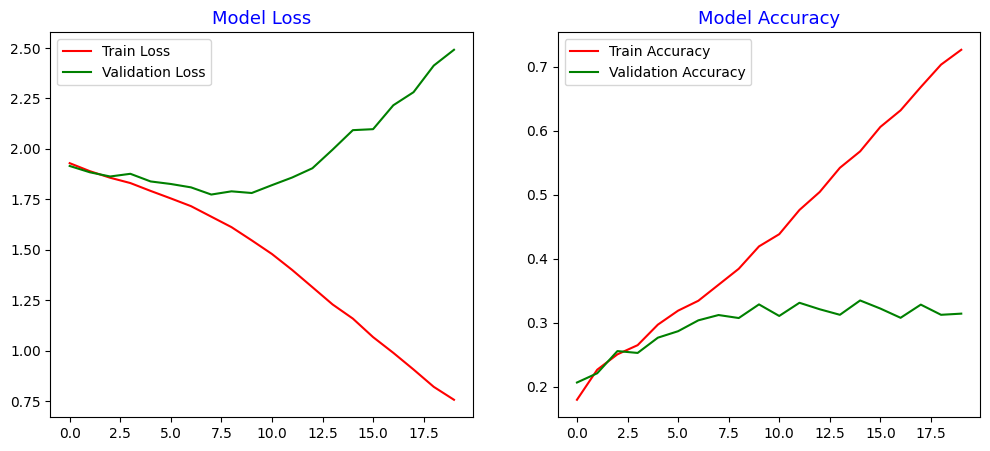

In [373]:
show_loss_accuracy(history4)

49/49 [==============================] - 2s 29ms/step


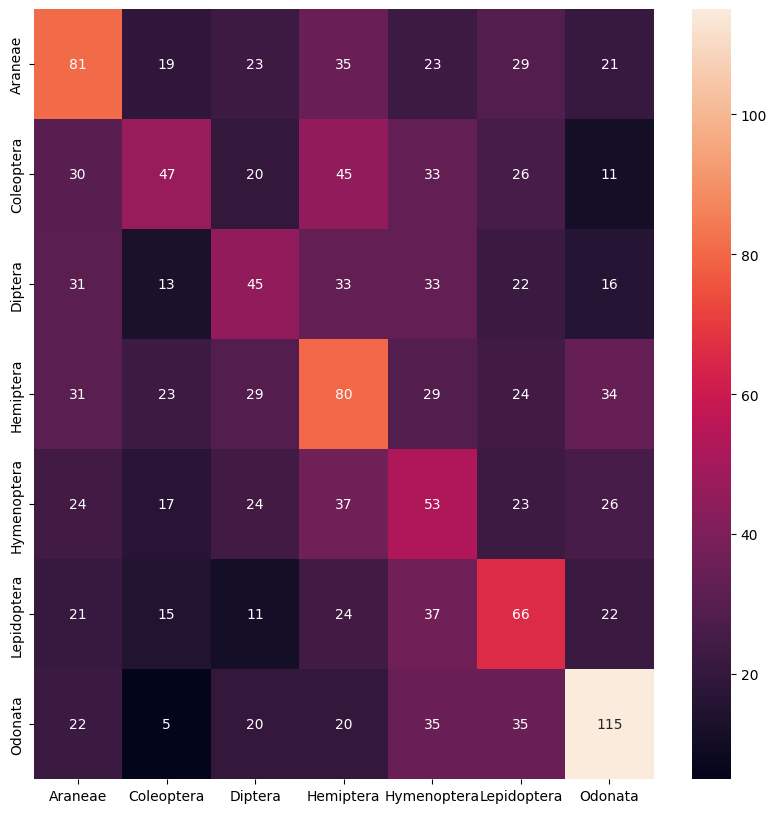

              precision    recall  f1-score   support

           0       0.34      0.35      0.34       231
           1       0.34      0.22      0.27       212
           2       0.26      0.23      0.25       193
           3       0.29      0.32      0.31       250
           4       0.22      0.26      0.24       204
           5       0.29      0.34      0.31       196
           6       0.47      0.46      0.46       252

    accuracy                           0.32      1538
   macro avg       0.32      0.31      0.31      1538
weighted avg       0.32      0.32      0.32      1538



In [374]:
show_matrix(model4, x_test, y_test)